# Laboratorio Práctico Integrador

Introducción
El presente laboratorio tiene como finalidad integrar los conceptos teóricos y prácticos que se abordaron en las clases anteriores. Se trabajaron los modelos de color RGB y HSV, los fundamentos ópticos de la cámara oscura y la manipulación de imágenes mediante la librería py5. El objetivo es aplicar estos conocimientos en una serie de ejercicios que conectan la generación de imágenes digitales desde cero con la captura de una imagen del mundo real a través de un dispositivo construido por ustedes mismos. Objetivos

Al finalizar este laboratorio, el estudiante será capaz de:

Implementar código en py5 para generar y guardar imágenes simples.
Aplicar los modelos de color RGB y HSV en un entorno de programación.
Construir un dispositivo óptico funcional (cámara oscura).
Capturar y digitalizar una imagen proyectada, para su posterior procesamiento.
Analizar cómo las condiciones de iluminación afectan la captura de una imagen.

In [ ]:
!pip install install-jdk --quiet
!python -c "import jdk; print('Java installed to', jdk.install('17'))"

Java installed to /root/.jdk/jdk-17.0.16+8


In [ ]:
!apt-get -qq install ca-certificates-java libxcursor1 libxrandr2 libxrender1 libxtst6 libxi6 xvfb > /dev/null # remove `> /dev/null` to see output

In [ ]:
# Esto es muy importante, de lo contrario obtendrás el error de "headless mode".
!nohup /usr/bin/Xvfb :0 -screen 0 1024x768x24 &
%env DISPLAY=:0

nohup: appending output to 'nohup.out'
env: DISPLAY=:0


In [ ]:
# No instales py5[extras] porque actualizará iPython y otros paquetes,
# lo que rompe la sesión y obliga a Colab a reiniciarse, reiniciando la instalación infinitamente.

!pip install py5 --quiet # elimina `--quiet` si quieres ver los detalles de la instalación

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.3 MB/s eta 0:00:00


In [ ]:
import py5
import py5_tools
import IPython.display as display

# Ejercicio 1: Figura en Espacio de Color RGB

1 - Abran un nuevo sketch en py5.

2 - Establezcan un lienzo (canvas) de 400x400 píxeles.

3 - Asegúrense de que el modo de color esté configurado en RGB, que es el modo por defecto. Pueden especificarlo explícitamente con color_mode(RGB).

4 - Dibujen una figura geométrica simple (por ejemplo, un rectángulo, una elipse o un triángulo).

5 - Asignen un color de relleno a la figura utilizando valores RGB.

6 - Guarden la imagen resultante en formato JPEG con el nombre figura_rgb.jpg.

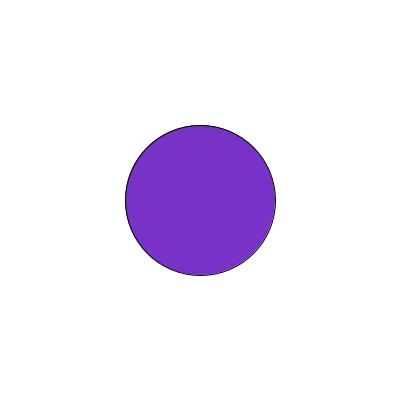

In [ ]:
def setup():
    # Establecer el tamaño del lienzo en 400x400 píxeles
    py5.size(400, 400)
    py5.color_mode(py5.RGB, 255)
    py5.background(255)
    py5.no_stroke()

    # Asignar un color de relleno
    py5.fill(255, 0, 255)

    # Dibujar una figura geométrica simple, en este caso, un rectángulo
    py5.triangle(200, 100, 100, 300, 300, 300)

    # Guardar la imagen
    py5.save_frame("figura_rgb.jpg")

    # Tomar una captura de pantalla
    py5_tools.screenshot()

    # Salir del sketch después de guardar la imagen y tomar la captura
    py5.exit_sketch()

py5.run_sketch()

# Mostrar la imagen guardada
display.display(display.Image("figura_rgb.jpg"))

# Ejercicio 2: Figura en Espacio de Color HSV
1 - Creen un nuevo sketch o modifiquen el anterior.

2 - Mantengan el tamaño del lienzo en 400x400 píxeles.

3 - Cambien el modo de color a HSV. Para esto, utilicen la función color_mode(HSV, 360, 100, 100), donde se definen los rangos para Matiz (Hue), Saturación (Saturation) y Brillo (Value).

4 - Dibujen una figura geométrica distinta a la del ejercicio anterior. Asignen un color de relleno a la figura utilizando valores HSV.

5 - Experimenten con distintos valores de matiz para observar la variación del color.

6 - Guarden la imagen resultante en formato JPEG con el nombre figura_hsv.jpg.

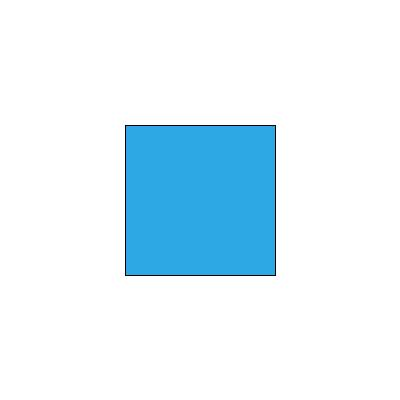

In [ ]:
def setup():
    # Establecer el tamaño del lienzo en 400x400 píxeles
    py5.size(400, 400)
    py5.color_mode(py5.HSB, 360, 100, 100)
    py5.background(0, 0, 100)

    # Asignar un color de relleno
    py5.fill(200, 80, 90)

    # Dibujar una figura geométrica simple, en este caso, un cuadrado
    py5.rect(125, 125, 150, 150)

    # Guardar la imagen
    py5.save_frame("figura_rgb.jpg")

    # Tomar una captura de pantalla
    py5_tools.screenshot()

    # Salir del sketch después de guardar la imagen y tomar la captura
    py5.exit_sketch()

py5.run_sketch()

# Mostrar la imagen guardada
display.display(display.Image("figura_rgb.jpg"))

# Construcción y Uso de la Cámara Oscura
En esta etapa, pasarán de lo digital a lo analógico para entender el proceso fundamental de la formación de imágenes.

Materiales:

Una caja de zapatos con tapa.
Cinta adhesiva opaca (cinta aisladora negra es ideal).
Papel manteca o de calcar.
Un alfiler o aguja.
Tijera o cúter.
Un teléfono celular con cámara.
Instrucciones:

Construcción de la Cámara:
En uno de los extremos más cortos de la caja, realicen con el alfiler un orificio muy pequeño y prolijo en el centro. Este será su estenopo (pinhole).
En el extremo opuesto, recorten una ventana rectangular, dejando un marco de aproximadamente 2 cm.
Peguen con la cinta un trozo de papel manteca sobre esta ventana, por la parte interior de la caja. El papel debe quedar lo más tenso posible. Esta será su pantalla de proyección.
Coloquen la tapa y sellen con cinta cualquier otra entrada de luz para asegurar que el interior esté completamente a oscuras.
Captura de la Imagen:
Dirijan el estenopo hacia una fuente de luz intensa (como una ventana o una lámpara).
Observen a través de la apertura superior de la caja (pueden abrirla ligeramente o hacer un visor) la imagen que se proyecta invertida sobre la pantalla de papel manteca.
Utilizando la cámara de su teléfono, tomen la mejor fotografía posible de esta imagen proyectada. Intenten que no ingrese luz externa al tomar la foto.
Visualización con py5:
Transfieran la fotografía capturada a la computadora.
Creen un nuevo sketch en py5 que cargue esta imagen y la muestre en la ventana.
Experimentación:
Prueben distintas condiciones de iluminación para la escena que capturan.
Preguntas para guiar la observación: ¿Qué sucede con la imagen proyectada si la fuente de luz es más intensa? ¿Y si es más tenue? ¿Cómo cambian el brillo y el contraste? Anoten sus observaciones.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/"

'Clase 01.ipynb'  'Clase 2 Integrador.ipynb'   Foto.jpg


In [ ]:
img = None

def setup():
    global img
    py5.size(400, 400)
    try:
        img = py5.load_image(r"/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
        py5.image(img, 0, 0, py5.width, py5.height)
    except Exception as e:
        print(f'Error al cargar la imagen: {e}')
        py5.background(200)
        py5.fill(0)
        py5.text_align(py5.CENTER, py5.CENTER)
        py5.text('Error: No se pudo cargar la imagen.', py5.width/2, py5.height/2)

py5.run_sketch()

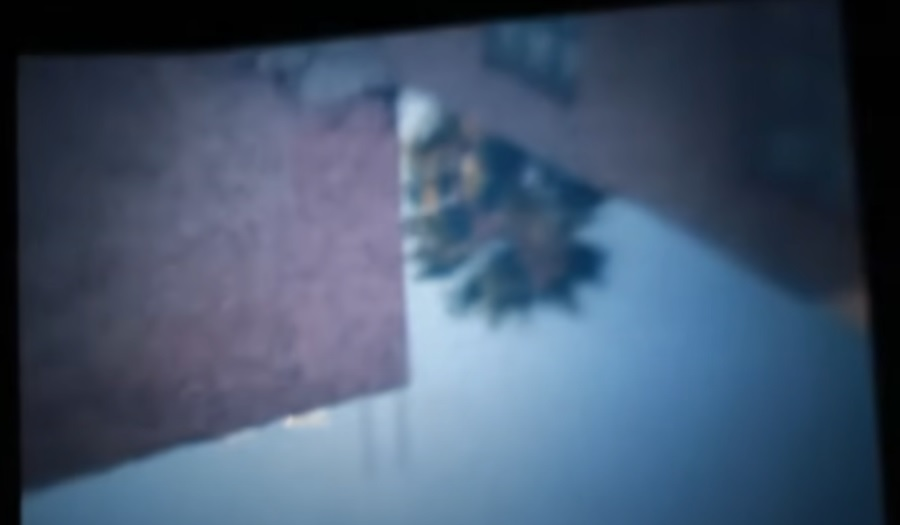

In [ ]:
display.display(display.Image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg"))

In [ ]:
py5.exit_sketch()

In [ ]:
img_color = None

def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def draw():
    if img_color:
        py5.no_stroke()

        # Original
        py5.no_tint()
        py5.image(img_color, 0, 0, 200, 200)

        # Escala de grises
        py5.tint(0, 0, 100)   # en modo HSB, 0° de tono, sin saturación
        py5.image(img_color, 200, 0, 200, 200)

        # Alto contraste
        py5.tint(0, 0, 50)
        py5.image(img_color, 400, 0, 200, 200)

        # Invertido (más “efecto negativo”)
        py5.filter(py5.INVERT)
        py5.image(img_color, 600, 0, 200, 200)

py5.run_sketch()

In [ ]:
py5.reset_py5()

True

In [ ]:
py5.reset_py5()

False

In [ ]:
img_color = None

def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def draw():
    if img_color:

        py5.color_mode(py5.HSB, 360, 100, 100) # En py5, HSB es equivalente a HSV
        py5.no_stroke()

        # Imagen original
        py5.no_tint()
        py5.image(img_color, 0, 0, 200, 200)

        # Tinte Rojo
        py5.tint(150, 150, 150)
        py5.image(img_color, 200, 0, 200, 200)

        # Tinte Verde
        py5.tint(50, 50, 50)
        py5.image(img_color, 400, 0, 200, 200)

        # Tinte Azul
        py5.tint(10, 10, 10)
        py5.image(img_color, 600, 0, 200, 200)

    else:
        py5.background(200)
        py5.fill(0)
        py5.text('Error al cargar la imagen', 10, 20)

py5.run_sketch()

Output(layout=Layout(max_height='200px', overflow='auto'))

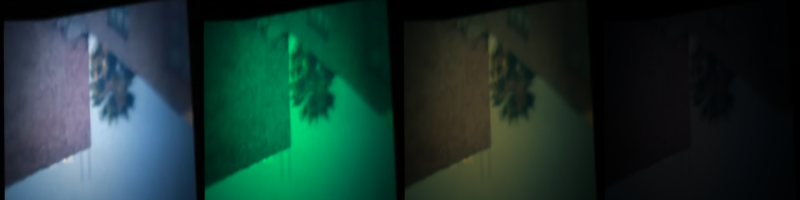

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

# Imagen con alto contraste


In [ ]:
def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def setup():
    py5.size(400, 400)


def draw():
    img = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    py5.image(img, 0, 0, 400, 400)  # Especificar el tamaño de la imagen
    py5.apply_filter(py5.THRESHOLD, 0.7)


py5.run_sketch()

Output(layout=Layout(max_height='200px', overflow='auto'))

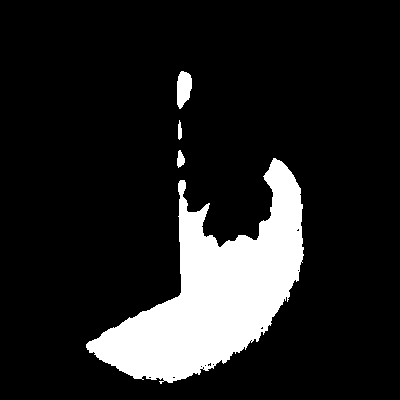

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

# Imagen en Blanco y Negro

In [ ]:
def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def setup():
    py5.size(400, 400)


def draw():
    img = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    py5.image(img, 0, 0, 400, 400)  # Especificar el tamaño de la imagen
    py5.apply_filter(py5.GRAY)


py5.run_sketch()

Output(layout=Layout(max_height='200px', overflow='auto'))

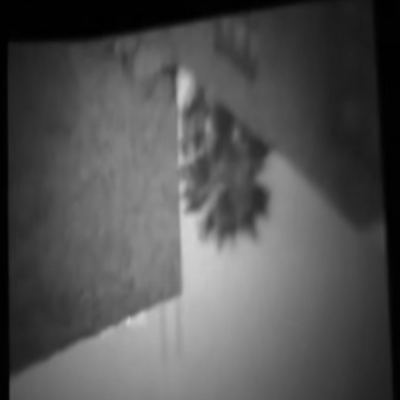

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

# Imagen con colores Invertidos

In [ ]:
def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def setup():
    py5.size(400, 400)


def draw():
    img = py5.load_image("/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/Foto.jpg")
    py5.image(img, 0, 0, 400, 400)  # Especificar el tamaño de la imagen
    py5.apply_filter(py5.INVERT)


py5.run_sketch()

Output(layout=Layout(max_height='200px', overflow='auto'))

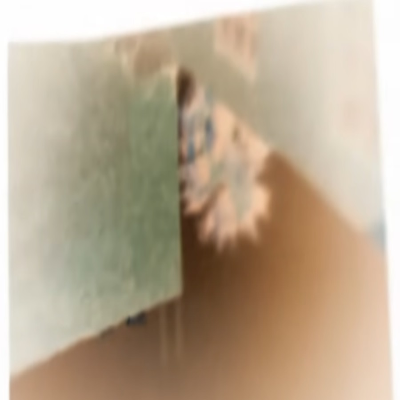

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

# Observaciones:
La imagen tomada se puede cargar sin mayores inconvenientes, y con distintos métodos se puede realizar una manipulación de los tonos, el contraste y los colores, como bien lo hacen los filtros de diferentes aplicaciones.

En algunos casos, al manipular los distintos parametros se pueden obtener imagenes abstractamas muy interesantes como en el caso del alto constraste.